## 1. Import packages

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


## 2. Import dataset

In [68]:
# import dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv',
                 sep=',')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


## 3. Exploratory Analysis
Notes:
1. shape = (2240,29)
2. Income has NaN values
3. Categorical Ordinal features: Education
4. Categorical Nominal features: Martial_Status
5. Numerical data: All other features


### 3.1 Let's see quantity of samples that has Income = NaN (None)

In [69]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


Notes:


### 3.2. Analyzing 10 samples (5 with target = 1 and 5 with target = 0)
Objective: find nice features and bad features. Maybe remove features to use better data

In [70]:
df_plus_age = df.copy()
df_plus_age['Age'] = df.apply(lambda x: 2014 - x['Year_Birth'], axis=1)
samples = df_plus_age.sort_values(by=['Response'], ascending=False).groupby('Response').head(5)
samples

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,57
1084,6072,1970,Master,Single,75345.0,0,0,2013-02-02,16,918,...,0,0,0,1,0,0,3,11,1,44
1000,10473,1956,PhD,Widow,78028.0,0,1,2012-09-10,38,158,...,0,1,1,0,0,0,3,11,1,58
1001,7962,1987,PhD,Single,95169.0,0,0,2013-10-09,1,1285,...,0,0,1,1,0,0,3,11,1,27
1002,9984,1981,2n Cycle,Married,56337.0,1,1,2013-03-27,25,349,...,1,0,0,1,0,0,3,11,1,33
106,7533,1964,Graduation,Married,49096.0,1,1,2013-09-24,15,144,...,0,0,0,0,0,0,3,11,0,50
105,8373,1979,Basic,Together,24594.0,1,0,2013-12-10,94,1,...,0,0,0,0,0,0,3,11,0,35
1587,2471,1965,Graduation,Married,61482.0,0,0,2014-06-27,39,48,...,0,0,0,0,0,0,3,11,0,49
1718,10640,1974,Graduation,Together,44392.0,1,1,2013-09-05,71,87,...,0,0,0,0,0,0,3,11,0,40
1588,5892,1980,Graduation,Married,34968.0,1,0,2013-04-10,11,158,...,0,0,0,0,0,0,3,11,0,34


Notes (Initial hypotheses):
- Columns correlated to Response: MntFruits,Meat,Fish,Hold; NumWebPurchases,CatalogPurchases; Education; Marital_Status
- Only 2 negative customers accepted the Campaign2
- None insight was found with positive customers related to older Campaigns

### 3.3 Lets see the statistics about data

In [71]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Notes:


### 3.4 Lets see the balancement of the dataset

In [72]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

Notes:
- The dataset is imbalanced
- Percentage of customers that responded to campaign: 15%
- Percentage of customers that not responded to campaign: 85%
- Therefore, the future model will be good to predict a customer that will not respond to a campaign and be bad to predict if customer will respond to campaign

### 3.4 Lets see the mean of each column based on label

In [73]:
df_3_4 = df.groupby('Response').mean()
df_3_4




,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
Response,,,,,,,,,,,,,,,,,,,,,
0,5622.009444,1968.698846,50839.132767,0.462225,0.541448,51.514690,269.104407,24.216684,144.624344,34.980063,...,5.736621,5.320567,0.045121,0.055089,0.037251,0.034103,0.005247,0.009444,3.0,11.0
1,5421.820359,1969.416168,60209.675676,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,...,6.095808,5.293413,0.230539,0.185629,0.275449,0.236527,0.059880,0.008982,3.0,11.0


Notes:
- Year_Birth, **Income**, **Mnt.***,  Num.* - NumWebVisitsMonth, **AcceptedCmp[1-5]** was higher for **Response = 1**
- **Kidhome**, **Teenhome**, **Recency**, NumWebVisitsMonth, Complain was higher for **Response = 0**
- OBS: for the Num.* columns, NumWebPurchases, NumCatalogPurchases, NumStorePurchases have the most significant diff (>0.15)

## 4. Visualizations
Let's drop columns that does not give information


In [74]:
df_4 = df.copy()
df_4 = df_4.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)
df_4

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,5,10,3,0,0,0,0,0,0,0


### 4.1 Univariate Plot

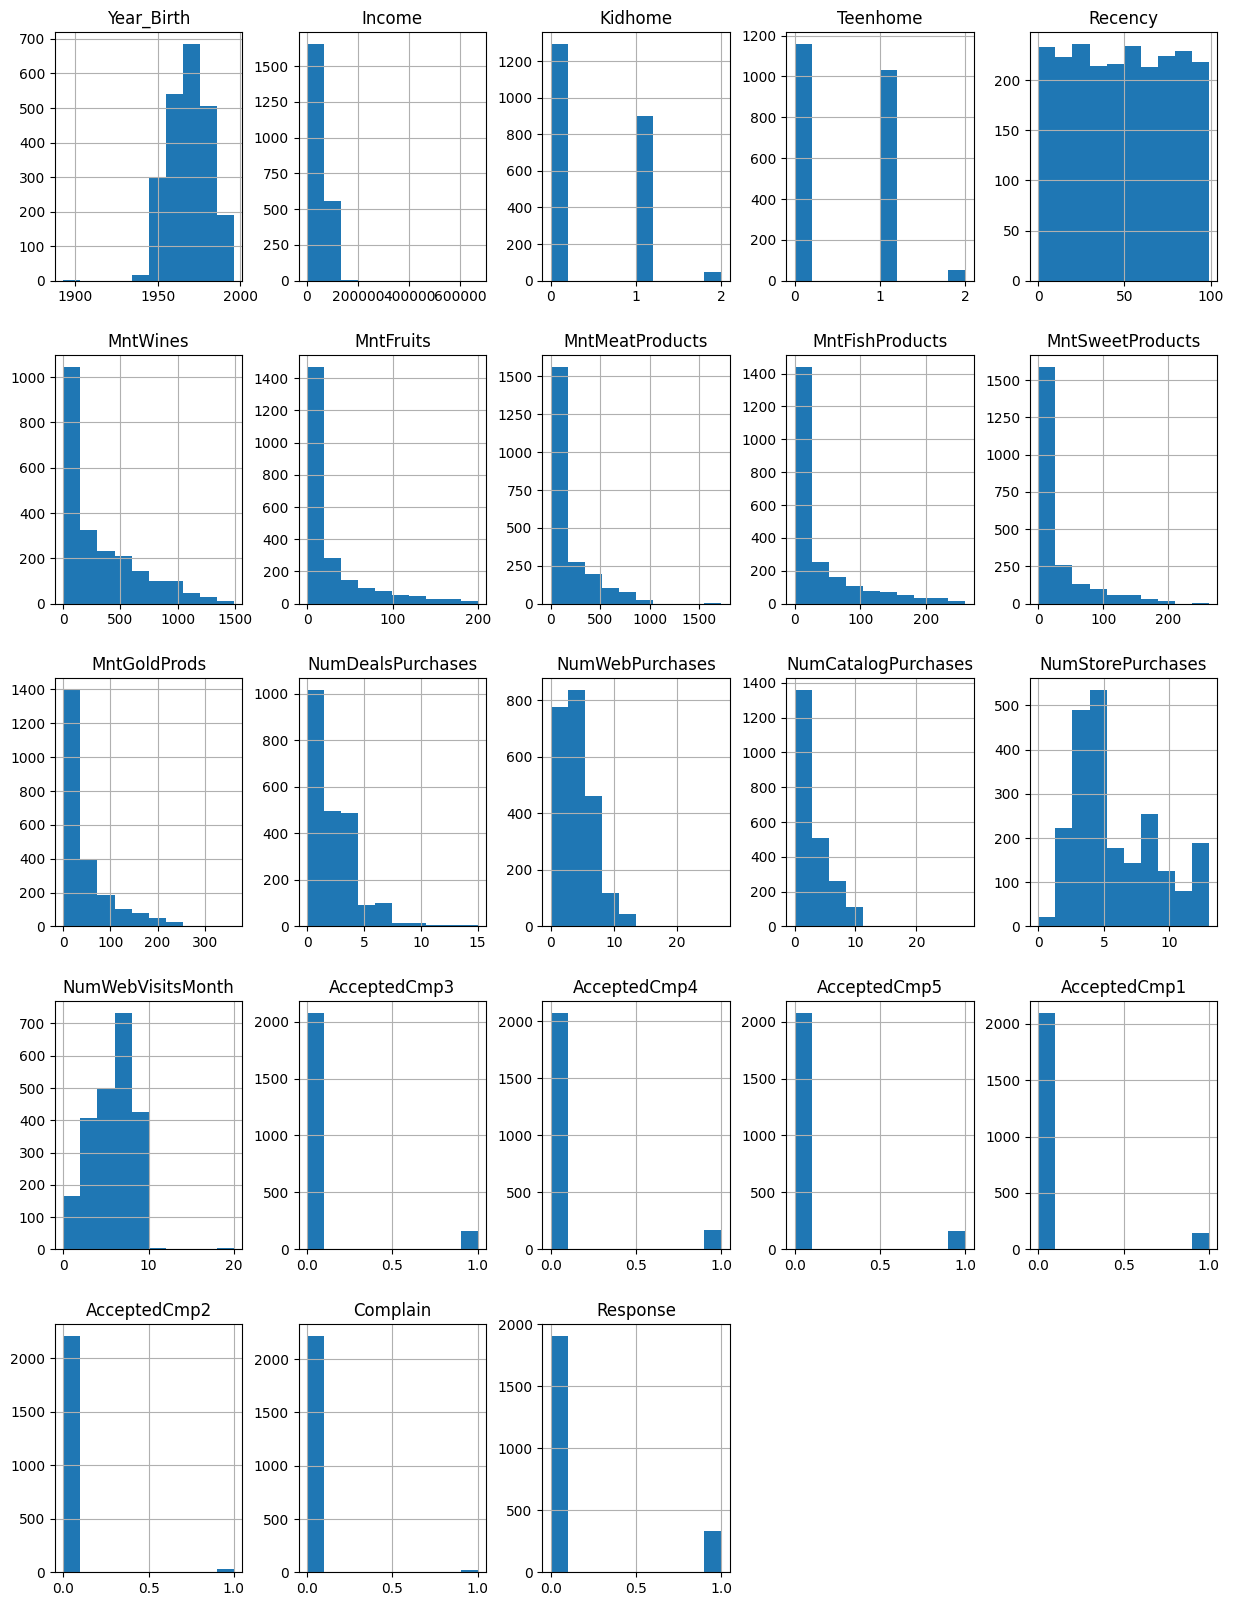

In [75]:
df_4.hist(figsize=(15, 20))
plt.show()

### 4.2 Multivariate Plot


Notes:
- Year_Birth, **Income**, **Mnt.***,  Num.* - NumWebVisitsMonth, **AcceptedCmp[1-5]** was higher for **Response = 1**
- **Kidhome**, **Teenhome**, **Recency**, NumWebVisitsMonth, Complain was higher for **Response = 0**
- OBS: for the Num.* columns, NumWebPurchases, NumCatalogPurchases, NumStorePurchases have the most significant diff (>0.15)

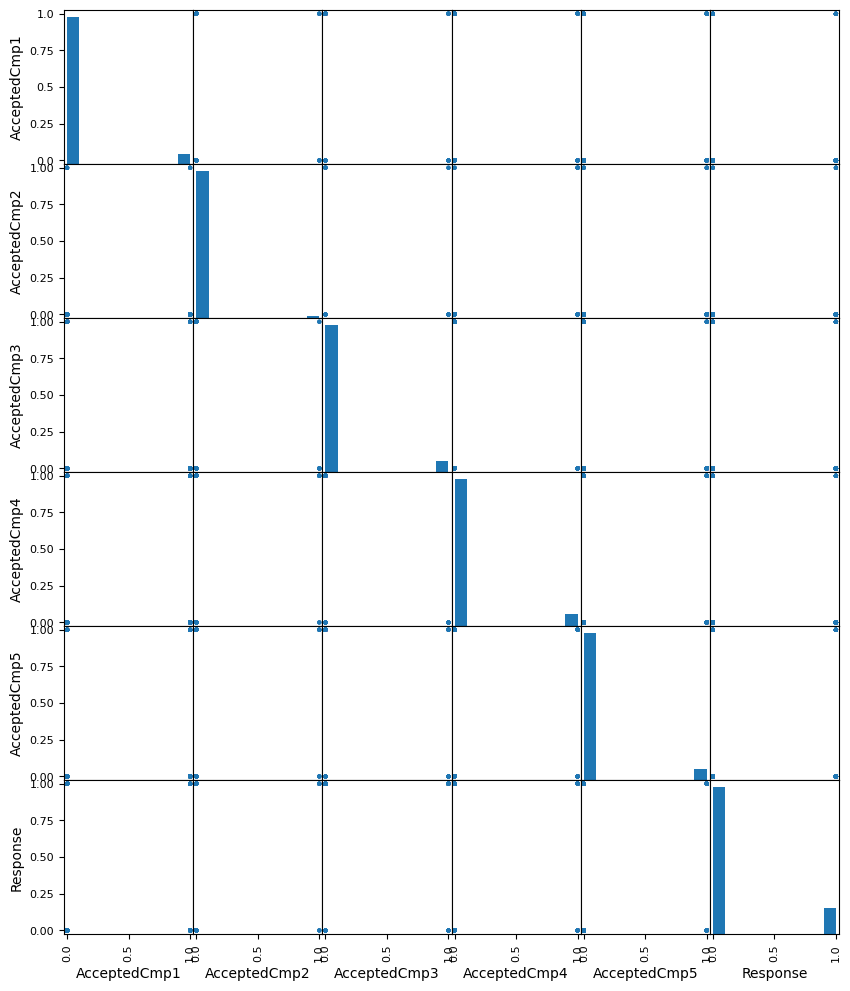

In [76]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
scatter_matrix(df_4_2, figsize=(10, 12))
plt.show()

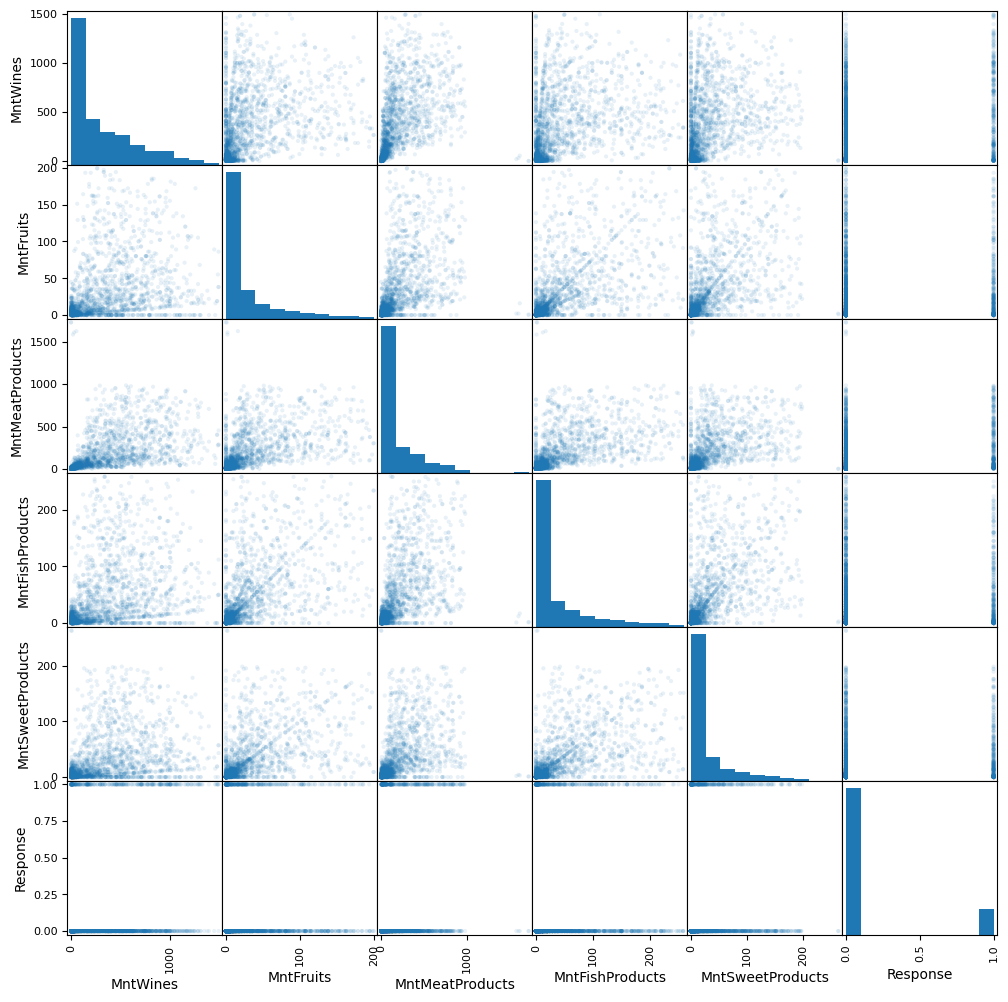

In [77]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['MntWines', 'MntFruits',
                        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'Response']]
scatter_matrix(df_4_2, figsize=(12, 12),alpha=0.1)
plt.show()

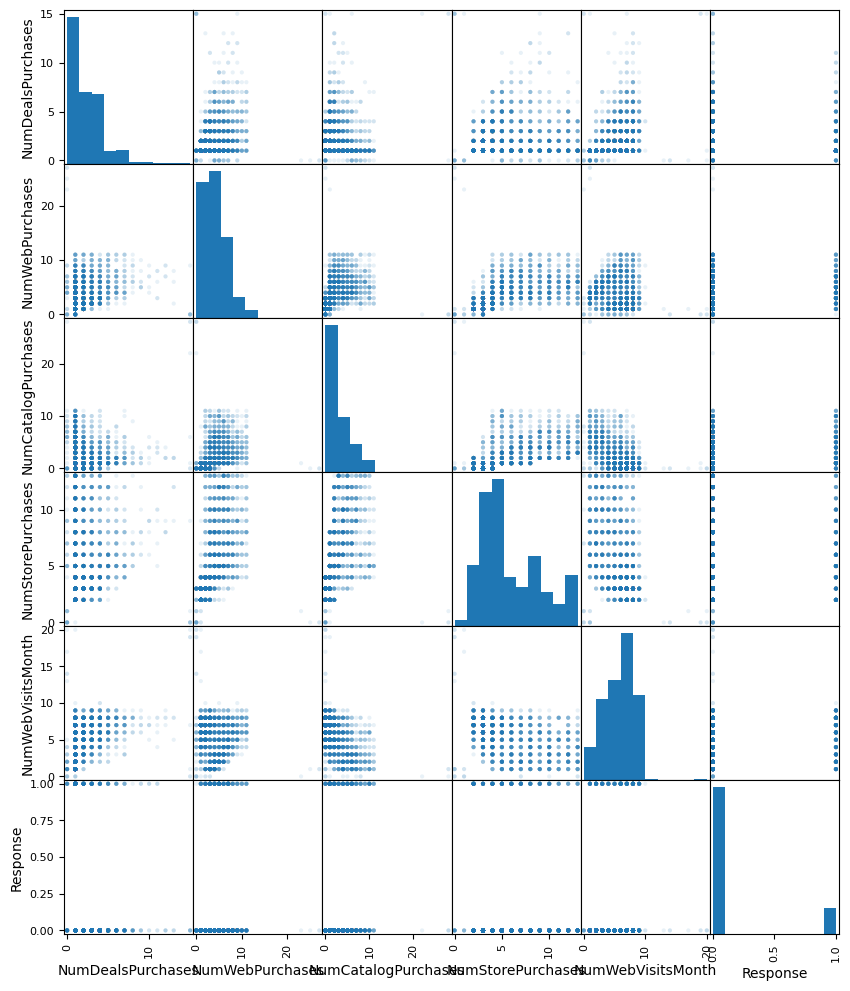

In [78]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['NumDealsPurchases', 'NumWebPurchases',
                        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response']]
scatter_matrix(df_4_2, figsize=(10, 12),alpha=0.1)
plt.show()

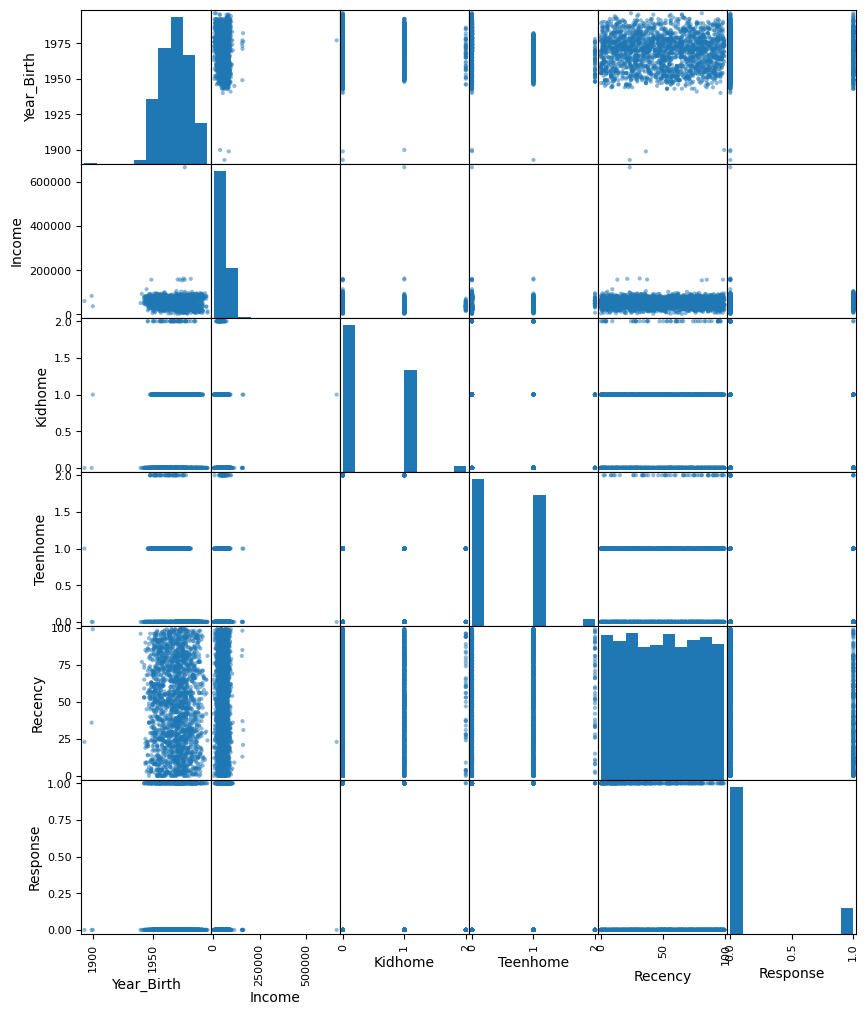

In [79]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
                        'Teenhome', 'Dt_Customer', 'Recency', 'Response']]
scatter_matrix(df_4_2, figsize=(10, 12))
plt.show()

Notes:
- Can be said that Higher Wine and Meet, higher the chance that is a positive costumer
- Can be said that higher fish, higher fruits and wine
- Can be said that higher wine, higher meat and sweets
- Can be said that lower the store purchases, higher the chance that is a negative costumer

### 4.3 Confirming notes above using corr()

In [81]:
corr = df_plus_age.corr()

TODO:
1. Ver quais são as features mais correlacionadas ao Response
2. Ver quais features são mais correlacionadas as features que são correlacionadas ao Response